In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from math import nan

In [2]:
basepath="/project/cas/islas/python_savs/CAM7_vertres_paper/grids/"
plotpath="/project/cas/islas/python_plots/CAM7_vertres_paper/FIGURES/"

#### Defaults

In [3]:
l110 = xr.open_dataset(basepath+'L110.nc')
waccm = xr.open_dataset(basepath+'WACCM.nc')
cam = xr.open_dataset(basepath+'CAM.nc')

#### 140km tests

In [4]:
dz400_140 = xr.open_dataset(basepath+"dz400_140km.nc")
dz600_140 = xr.open_dataset(basepath+"dz600_140km.nc")
dz700_140 = xr.open_dataset(basepath+"dz700_140km.nc")
dz800_140 = xr.open_dataset(basepath+"dz800_140km.nc")
dz900_140 = xr.open_dataset(basepath+"dz900_140km.nc")
dz1000_140 = xr.open_dataset(basepath+"dz1000_140km.nc")

### 80km tests

In [5]:
dz500_80 = xr.open_dataset(basepath+"dz500_80km.nc")
dz600_80 = xr.open_dataset(basepath+"dz600_80km.nc")
dz700_80 = xr.open_dataset(basepath+"dz700_80km.nc")
dz800_80 = xr.open_dataset(basepath+"dz800_80km.nc")

### Taper tests

In [6]:
taper15 = xr.open_dataset(basepath+"dz500_80km_taper15km.nc")
taper20 = xr.open_dataset(basepath+"dz500_80km_taper20km.nc")
taper25 = xr.open_dataset(basepath+"dz500_80km_taper25km.nc")

### Calculate the dz based on the height of the pressure levels calculated assuming a scale height of 7km

In [7]:
def calcdz(dat):
    H=7000.
    z=-H*np.log(dat.ilev/1000.)
    dz = -1.*(np.array(z.isel(ilev=slice(1,dat.ilev.size))) - np.array(z.isel(ilev=slice(0,dat.ilev.size-1))))
    return dz

### Set up the plot

In [8]:
def setupplot(x1, x2, y1, y2, titlestr, xlim=None):
    H=7000.
    ax = fig.add_axes([x1, y1, x2-x1, y2-y1])
    ax.set_ylim(-np.log(1000),-np.log(1e-6))
    if (xlim):
        ax.set_xlim(0,xlim)
        ax.set_xticks( (np.arange(0,xlim/500+1,1)*500).astype(int).tolist())
        ax.set_xticklabels( (np.arange(0,xlim/500+1,1)*500).astype(int).tolist(), fontsize=13)
    else:
        ax.set_xlim(0,5800)
        ax.set_xticks(np.arange(0,5500/1000+1,1)*1000)
        ax.set_xticklabels( (np.arange(0,5500/1000+1,1)*1000).astype(int).tolist(), fontsize=13)
        
    ax.set_yticks([-np.log(1000),-np.log(100),-np.log(10),-np.log(1),-np.log(0.1),
                   -np.log(0.01),-np.log(0.001),-np.log(0.0001),-np.log(0.00001),-np.log(0.000001)])
    ax.set_yticklabels(['1000','100','10','1','0.1','1e-2','1e-3','1e-4','1e-5','1e-6'], fontsize=13)
    ax.set_ylabel('Pressure (hPa)', fontsize=14)
    
    ax2 = ax.twinx()
    ax2.set_ylim(-np.log(1000),-np.log(1e-6))
    
    zticks=[0,20,40,60,80,100,120,140]
    ztickvals = [1000.*np.exp(-zticks[i]*1000./H) for i in np.arange(0,len(zticks),1)]
    ax2.set_yticks(-np.log(ztickvals))
    ax2.set_yticklabels(['0','20','40','60','80','100','120','140'], fontsize=13)
    ax2.set_ylabel('Height (km)', fontsize=14)
    
    ax.set_title(titlestr,fontsize=16)
    ax.set_xlabel('dz (m)', fontsize=14)
    
    return ax

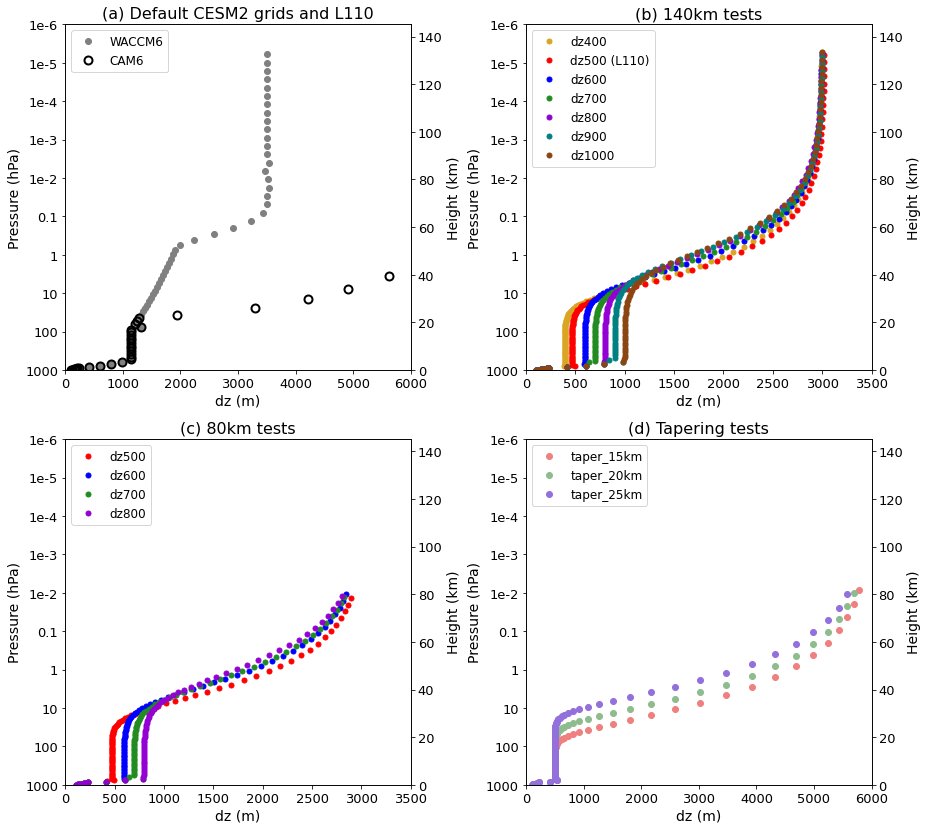

In [12]:
fig = plt.figure(figsize=(16,16))

ax = setupplot(0.02,0.32,0.7,1,'(a) Default CESM2 grids and L110')
dz_waccm = calcdz(waccm)
ax.plot(dz_waccm,-1.*np.log(waccm.lev),"o", color='gray', label='WACCM6')
dz_cam = calcdz(cam)
ax.plot(dz_cam, -1.*np.log(cam.lev),"o", markerfacecolor='none',markeredgecolor='black', markersize=8, markeredgewidth=2, label='CAM6')
dz_l110 = calcdz(l110)
#ax.plot(dz_l110, -1.*np.log(l110.lev),"o", color='red', label='L110')
ax.legend(loc='upper left', fontsize=12)


msize=5
ax = setupplot(0.42,0.72,0.7,1,'(b) 140km tests', xlim=3500)
dz_dz400_140 = calcdz(dz400_140)
ax.plot(dz_dz400_140, -1.*np.log(dz400_140.lev),"o", color='goldenrod', label='dz400', markersize=msize)
ax.plot(dz_l110, -1.*np.log(l110.lev),"o", color='red', label='dz500 (L110)', markersize=msize)
dz_dz600_140 = calcdz(dz600_140)
ax.plot(dz_dz600_140, -1.*np.log(dz600_140.lev),"o", color='blue', label='dz600', markersize=msize)
dz_dz700_140 = calcdz(dz700_140)
ax.plot(dz_dz700_140, -1.*np.log(dz700_140.lev),"o", color='forestgreen', label='dz700', markersize=msize)
dz_dz800_140 = calcdz(dz800_140)
ax.plot(dz_dz800_140, -1.*np.log(dz800_140.lev),"o", color='darkviolet', label='dz800', markersize=msize)
dz_dz900_140 = calcdz(dz900_140)
ax.plot(dz_dz900_140, -1.*np.log(dz900_140.lev),"o", color='teal', label='dz900', markersize=msize)
dz_dz1000_140 = calcdz(dz1000_140)
ax.plot(dz_dz1000_140, -1.*np.log(dz1000_140.lev),"o", color='saddlebrown', label='dz1000', markersize=msize)
ax.legend(loc='upper left', fontsize=12)


msize=5
ax = setupplot(0.02,0.32,0.34,0.64,'(c) 80km tests', xlim=3500.)
dz_dz500_80 = calcdz(dz500_80)
ax.plot(dz_dz500_80, -1.*np.log(dz500_80.lev),"o", color='red', label='dz500', markersize=msize)
dz_dz600_80 = calcdz(dz600_80)
ax.plot(dz_dz600_80, -1.*np.log(dz600_80.lev),"o", color='blue', label='dz600', markersize=msize)
dz_dz700_80 = calcdz(dz700_80)
ax.plot(dz_dz700_80, -1.*np.log(dz700_80.lev),"o", color='forestgreen', label='dz700', markersize=msize)
dz_dz800_80 = calcdz(dz800_80)
ax.plot(dz_dz800_80, -1.*np.log(dz800_80.lev),"o", color='darkviolet', label='dz800', markersize=msize)

ax.legend(loc='upper left', fontsize=12)

ax = setupplot(0.42,0.72,0.34,0.64,'(d) Tapering tests')
dz_taper15 = calcdz(taper15)
ax.plot(dz_taper15,-1.*np.log(taper15.lev),"o",color='lightcoral',label='taper_15km')
dz_taper20 = calcdz(taper20)
ax.plot(dz_taper20,-1.*np.log(taper20.lev),"o",color='darkseagreen', label='taper_20km')
dz_taper25 = calcdz(taper25)
ax.plot(dz_taper25,-1.*np.log(taper25.lev),"o",color='mediumpurple', label='taper_25km')

ax.legend(loc='upper left',fontsize=12)

fig.savefig(plotpath+'fig1.pdf', bbox_inches='tight', facecolor='white')
